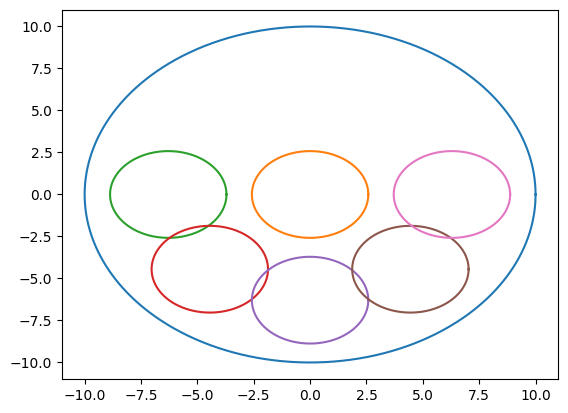

In [2]:
import numpy as np
import matplotlib.pyplot as plt
r = 10
theta = np.linspace(0, 2 * np.pi, 1000)
plt.plot(r * np.cos(theta), r * np.sin(theta))
bundle_area = np.pi * r ** 2
fibers = 15
fiber_area_estimate = bundle_area / fibers
fiber_r = np.sqrt(fiber_area_estimate / np.pi)
n_of_fibers = int(r / fiber_r)
radius_to_draw = np.linspace(0, r - fiber_r, n_of_fibers)
if radius_to_draw[-1] + 2 * fiber_r > r:
    radius_to_draw = radius_to_draw[:-1]
arc_length = np.pi * radius_to_draw
n_fibers_per_ring = (arc_length / fiber_r + 1).astype(int)
# plt.plot(fiber_r * np.cos(theta) - (r - (fiber_r + spacing)) * np.cos(3 * np.pi / 2), fiber_r * np.sin(theta) - (r - (fiber_r + spacing)) * np.sin(3 * np.pi / 2))
for i in range(0, int(len(n_fibers_per_ring) / 2 + 1)):
# for i in range(0, 2):
    thetas = np.linspace(0, np.pi, n_fibers_per_ring[i])
    for t in thetas:
        plt.plot(fiber_r * np.cos(theta) - ((radius_to_draw[i] + fiber_r * i) * np.cos(t)), fiber_r * np.sin(theta) - ((radius_to_draw[i] + fiber_r * i) * np.sin(t)))
plt.show()

2.0008342722308017
0.20008342722308017


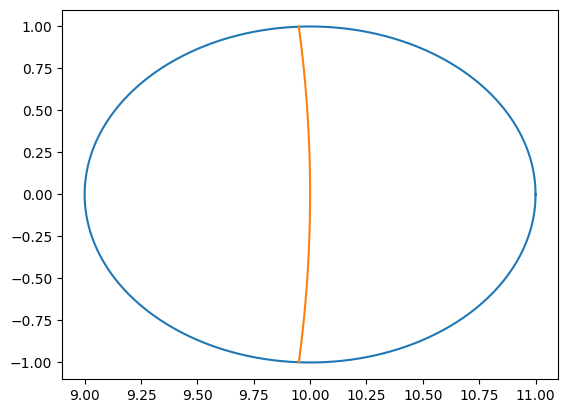

In [3]:
R = 10
r = 1
# plt.plot(R * np.cos(theta), R * np.sin(theta))
t = np.pi
plt.plot(r *  np.cos(theta) - R * np.cos(t), r * np.sin(theta) - R * np.sin(t))
arc_length = 2 * R * np.arccos(1 - r ** 2 / (2 * R ** 2))
print(arc_length)
print(arc_length / R)
t = np.linspace(-arc_length / R / 2, arc_length / R / 2, 100)
plt.plot(R * np.cos(t), R * np.sin(t))

62


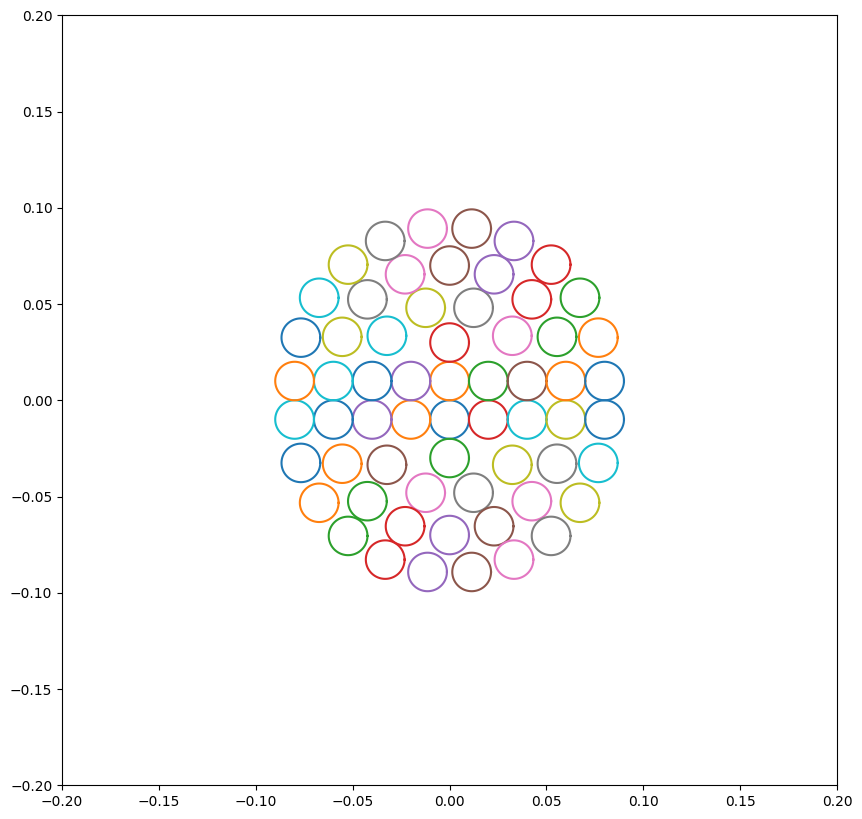

62


In [3]:
R = 1e-1 # approximate outter radius. Sometimes the fiber bundle is under/over filled
window = 1e-1
theta = np.linspace(0, 2 * np.pi, 100)
r = 1e-2
t = 0
half_circle_R = R - r
r_steps = np.r_[r, np.linspace(2 * r, half_circle_R - half_circle_R % (2 * r), int(half_circle_R / (2 * r)))]
fibers = 0
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.set_xlim(-R - window, R + window)
ax.set_ylim(-R - window, R + window)
# ax.plot(R * np.cos(theta), R * np.sin(theta))
for i in range(0, len(r_steps)):
    thetas = np.linspace(0, np.pi, int(np.pi / ((2 * r_steps[i] * np.arccos(1 - r ** 2 / (2 * r_steps[i] ** 2))) / r_steps[i])))
    for t in thetas:
        if i == 0:
            ax.plot(r * np.cos(theta), r * np.sin(theta) - r)
        else:
            ax.plot(r * np.cos(theta) - r_steps[i] * np.cos(t), r * np.sin(theta) - r_steps[i] * np.sin(t) - r)
        fibers += 1
for i in range(0, len(r_steps)):
    thetas = np.linspace(np.pi, 2 * np.pi, int(np.pi / ((2 * r_steps[i] * np.arccos(1 - r ** 2 / (2 * r_steps[i] ** 2))) / r_steps[i])))
    for t in thetas:
        if i == 0:
            ax.plot(r * np.cos(theta), r * np.sin(theta) + r)
        else:
            ax.plot(r * np.cos(theta) - r_steps[i] * np.cos(t), r * np.sin(theta) - r_steps[i] * np.sin(t) + r)
        fibers += 1
# laser = 25
# ax.fill(laser * np.cos(theta), laser * np.sin(theta), zorder = -1, c = "r")
# ax.axline((0, 50), (50, 50))
# ax.axline((50, 50), (50, -50))
# ax.axline((-50, -50), (50, -50))
# ax.axline((-50, -50), (-50, 50))
print(fibers)
plt.show()
print(14+18+12+10+8)

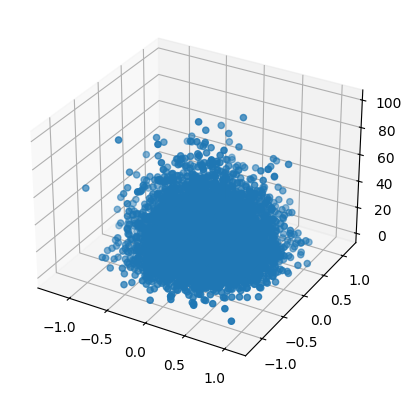

(94.39738510150742, 1.6045243492826738e-07)


In [32]:
import fiber
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import tplquad as integrate
from laser import Laser, Ray
resolution = 10000
thetas = np.linspace(0, 2 * np.pi, resolution)
max_waist = 0.5
min_waist = 0.1
waist = np.random.rand() * (max_waist - min_waist) + min_waist
x, y = np.random.normal(0, waist, size = (2, resolution))
r = np.linspace(-waist, waist, resolution)
I = np.exp(-2 * r ** 2 / (waist ** 2)) * np.abs(np.random.normal(scale = waist, size = resolution))
I = 100 * (I / np.max(I))
fig = plt.figure()
ax = plt.axes(projection = "3d")
ax.scatter(x, y, I)
plt.show()
def gaussian(x, y, z):
    return 100 * np.exp((-2 * (x ** 2 + y ** 2 + z ** 2)))
P = integrate(gaussian, min(x), max(x), min(y), max(y), min(I), max(I))
print(P)

In [7]:
import fiber
import laser
import matplotlib.pyplot as plt
import numpy as np
import time 
from joblib import Parallel, delayed
%reload_ext autoreload
%autoreload 2
bundle = fiber.FiberBundle(1e-1, 1e-3)
l = laser.Laser(res = 10000, max_waist = 1e-2, min_waist = 9e-3, power = 200)

51.90100646018982 seconds


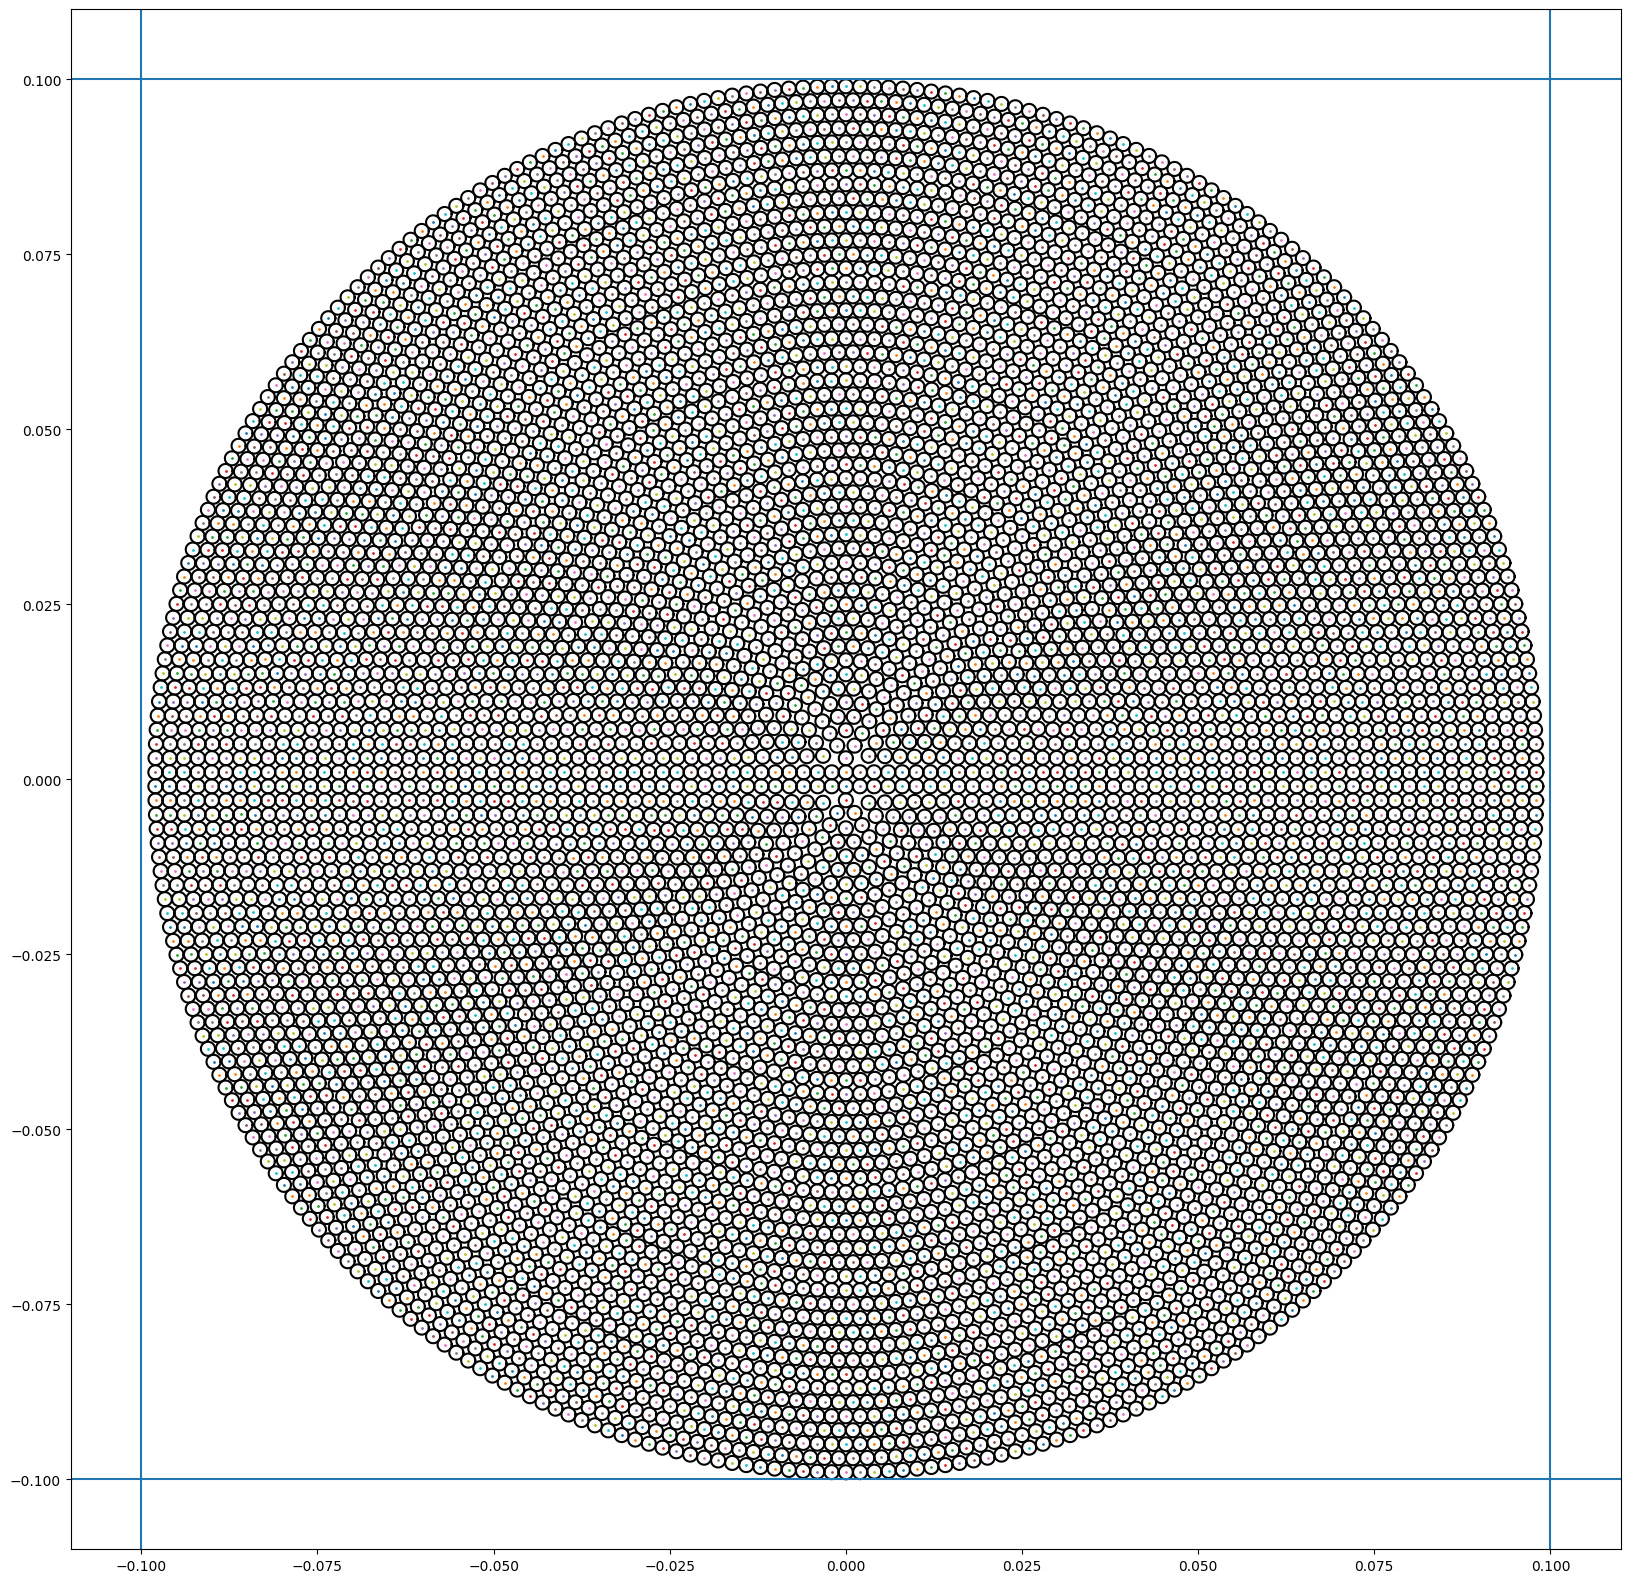

In [19]:
t1 = time.time()
fig, ax = bundle.plot(centers = True, figsize = (20, 20), scatter_size = 1, c = "k")
t2 = time.time()
print(t2 - t1, "seconds")

In [ ]:
import vispy.plot as vp
fig = vp.Fig(size = (2000, 2000), show = False)
plot = fig[0, 0]
fig.title = "Fiber Bundle"
t1 = time.time()
for ring in bundle.fibers:
    for f in ring:
        plot.plot(f.x, f.y)
fig.show(run = True)
t2 = time.time()
print(t2 - t1, "seconds")

RFBOutputContext()